##  Modeling the Impact of Root Distributions Parameterizations on Total Evapotranspiration in the Reynolds Mountain East catchment using pySUMMA

## 1. Introduction

One part of the Clark et al. (2015) study explored the impact of root distribution on total evapotranspiration (ET) using a SUMMA model for the Reynolds Mountain East catchment. This study looked at sensitivity of different root distribution exponents (0.25, 0.5, 1.0). The sensitivity of evapotranspiration to the distribution of roots, which dictates the capability of plants to access water. 

In this Jupyter Notebook, the pySUMMA library is used to reproduce this analysis. According to the application of different root distribution exponenets (0.25, 0.5, 1.0), the sensitivity of result describes. 
The Results section shows how to use pySUMMA and the Pandas library to reproduce Figure 8(left) from Clark et al. (2015). 

Collectively, this Jupyter Notebook serves as an example of how hydrologic modeling can be conducted directly within a Jupyter Notebook by leveraging the pySUMMA library. 

## 2. Background

### The Transpiration from soil layers available in SUMMA

\begin{equation*}
(S_{et}^{soil})_j = \frac{(f_{roots})_j(\beta_{v})_j}{\beta_v} \frac{(Q_{trans}^{veg})}{L_{vap}\rho_{liq}(\Delta z)_j} + (S_{evap}^{soil})_j 
\end{equation*}

The transpiration sink term $(S_{et}^{soil})_j$ is computted for a given soil layer $j$.

$Q_{trans}^{veg} (W/m^2)$ : the transpiration flux, $(\beta_{v})_j$ : the soil water stress for the j-th soil layer

$\beta_v$ : the total water availability stress factor, $(f_{roots})_j$ : the fraction of roots in the j-th soil layer

$(\Delta z)_j$ : the depth of the j-th soil layer, $L_{vap} (J/kg), \rho_{liq} (kg/m^3)$ : respectively the latent heat of vaporization and the intrinsic density of liquid water

$(S_{evap}^{soil})_j     (s^{-1})$ : the ground evaporation (only defined for the upper-most soil layer)

The above images are taken from the Stomal Resistance Method section within the manual Structure for Unifying Multiple Modeling Alternatives (SUMMA), Version 1.0: Technical Description (April, 2015).

## 3. Methods

### 1) Install pySUMMA from GitHub (UVA-Hydroinformatics/pysumma-master branch)

In [1]:
# On CyberGIS, pySUMMA installed, so users don't need to install pySUMMA.
#!/opt/conda/bin/pip install git+https://github.com/uva-hydroinformatics/pysumma.git@master

### 2) Download SUMMA Model Instance from HydroShare

In [1]:
from pysumma.utils import utils

In [2]:
# Download SUMMA Model Instance from HydroShare
resource_id = 'eed6f3faedad4c17992bb361bd492caa'
instance = utils.download_model_instance(resource_id)

### 3) Study Area

#### The Reynolds Mountain East catchment is located in southwestern Idaho as shown in the figure below.

In [3]:
from ipyleaflet import Map, GeoJSON
import json, os

In [4]:
m = Map(center=[43.06745, -116.75489], zoom=15)
with open(os.getcwd() + '/' + instance + '/data/reynolds_geojson_latlon.geojson') as f:
    data = json.load(f)
g = GeoJSON(data=data)
m.add_layer(g)
m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

### 4) Create pySUMMA Simulation Object

In [5]:
from pysumma.Simulation import Simulation
import os

In [6]:
# path to the SUMMA filemanager file
file_manager = os.getcwd() + '/' + instance + '/settings/summa_fileManager_riparianAspenPerturbRoots.txt'

In [7]:
# create a pySUMMA simulation object using the SUMMA 'file manager' input file 
S = Simulation(file_manager)

ModelOuput master file filepath: /home/jovyan/work/notebooks/data/c1bb4a12bff44bf08c5958cba7947348/c1bb4a12bff44bf08c5958cba7947348/data/contents/SummaModel_ReynoldsAspenStand_RootDistribution_sopron/settings/meta/var_lookup.f90


### 5) Check root Distribution Exponents

In [8]:
import xarray as xr
Param_trial = xr.open_dataset(os.path.dirname(file_manager)+'/'+S.para_trial.value)
Param_trial.rootDistExp

<xarray.DataArray 'rootDistExp' (hru: 5)>
array([1.  , 0.5 , 0.25, 1.  , 1.  ])
Dimensions without coordinates: hru

### 6) Run SUMMA for the different root Distribution Exponents and stomatal resistance parameterization

In [9]:
# set the simulation start and finish times
S.decision_obj.simulStart.value = "2006-07-01 00:00"
S.decision_obj.simulFinsh.value = "2007-09-30 00:00"

In [10]:
S.decision_obj.stomResist.options

['BallBerry', 'Jarvis', 'simpleResistance']

In [11]:
# set "simple Resistance" method
S.decision_obj.stomResist.value = 'simpleResistance'
S.decision_obj.stomResist.value

'simpleResistance'

In [12]:
S.output_prefix.value = "simpleResistance"

#### 6.1) run the model with giving the output prefix "simpleResistance"

#### if you executed SUMMA for this test case previously and have output file in output folder, you can move to next line.

In [13]:
S.executable = "/code/bin/summa.exe"
results_sim_rootDistExp, output_sim_rootDistExp = S.execute(run_suffix="simpleResistance", run_option = 'local')

/home/jovyan/libs/specworker/__init__.py:4: Warning: The SPECS library is in beta development, use at your own risk.
  warnings.warn("The SPECS library is in beta development, use at your own risk.", Warning)


Job finished                                           
task complete
file_master is '/tmp/summa/home/jovyan/work/notebooks/data/c1bb4a12bff44bf08c5958cba7947348/c1bb4a12bff44bf08c5958cba7947348/data/contents/SummaModel_ReynoldsAspenStand_RootDistribution_sopron/settings/summa_fileManager_riparianAspenPerturbRoots.txt_tmp'.
start at 00:38:08
Name of Model Output control file: /tmp/summa/home/jovyan/work/notebooks/data/c1bb4a12bff44bf08c5958cba7947348/c1bb4a12bff44bf08c5958cba7947348/data/contents/SummaModel_ReynoldsAspenStand_RootDistribution_sopron/settings/meta/Model_Output.txt
decisions file =  /tmp/summa/home/jovyan/work/notebooks/data/c1bb4a12bff44bf08c5958cba7947348/c1bb4a12bff44bf08c5958cba7947348/data/contents/SummaModel_ReynoldsAspenStand_RootDistribution_sopron/settings/summa_zDecisions_riparianAspenPerturbRoots.txt
   1 simulStart: 2006-07-01 00:00
   2 simulFinsh: 2007-08-20 00:00
   3 soilCatTbl: ROSETTA
   4 vegeParTbl: USGS
   5 soilStress: NoahType
   6 stomResist: simp

In [14]:
# get xarry output and output path if you executed SUMMA.
S.output_prefix.value = "simpleResistance"
results_sim_rootDistExp, output_sim_rootDistExp = S.get_output("cuahsi_sopron", S.output_prefix.value)

#### 6.2) run the model with giving the output prefix "Ball Berry"

In [15]:
# set "Ball Berry" method
S.decision_obj.stomResist.value = 'BallBerry'
S.decision_obj.stomResist.value

'BallBerry'

In [16]:
S.output_prefix.value = "BallBerry"

#### if you executed SUMMA for this test case previously and have output file in output folder, you can move to next line.

In [17]:
S.executable = "/code/bin/summa.exe"
results_ball_rootDistExp, output_ball_rootDistExp = S.execute(run_suffix="BallBerry", run_option = 'local')

Job finished                                           
task complete
file_master is '/tmp/summa/home/jovyan/work/notebooks/data/c1bb4a12bff44bf08c5958cba7947348/c1bb4a12bff44bf08c5958cba7947348/data/contents/SummaModel_ReynoldsAspenStand_RootDistribution_sopron/settings/summa_fileManager_riparianAspenPerturbRoots.txt_tmp'.
start at 00:38:57
Name of Model Output control file: /tmp/summa/home/jovyan/work/notebooks/data/c1bb4a12bff44bf08c5958cba7947348/c1bb4a12bff44bf08c5958cba7947348/data/contents/SummaModel_ReynoldsAspenStand_RootDistribution_sopron/settings/meta/Model_Output.txt
decisions file =  /tmp/summa/home/jovyan/work/notebooks/data/c1bb4a12bff44bf08c5958cba7947348/c1bb4a12bff44bf08c5958cba7947348/data/contents/SummaModel_ReynoldsAspenStand_RootDistribution_sopron/settings/summa_zDecisions_riparianAspenPerturbRoots.txt
   1 simulStart: 2006-07-01 00:00
   2 simulFinsh: 2007-08-20 00:00
   3 soilCatTbl: ROSETTA
   4 vegeParTbl: USGS
   5 soilStress: NoahType
   6 stomResist: Ball

In [18]:
# get xarry output and output path if you executed SUMMA.
S.output_prefix.value = "BallBerry"
results_ball_rootDistExp, output_ball_rootDistExp = S.get_output("cuahsi_sopron", S.output_prefix.value)

#### 6.3) run the model with giving the output prefix "Jarvis"

In [19]:
# set "Javis" method
S.decision_obj.stomResist.value = 'Jarvis'
S.decision_obj.stomResist.value

'Jarvis'

In [20]:
S.output_prefix.value = "Jarvis"

#### if you executed SUMMA for this test case previously and have output file in output folder, you can move to next line.

In [21]:
S.executable = "/code/bin/summa.exe"
results_jar_rootDistExp, output_jar_rootDistExp = S.execute(run_suffix="Jarvis", run_option = 'local')

Job finished                                           
task complete
file_master is '/tmp/summa/home/jovyan/work/notebooks/data/c1bb4a12bff44bf08c5958cba7947348/c1bb4a12bff44bf08c5958cba7947348/data/contents/SummaModel_ReynoldsAspenStand_RootDistribution_sopron/settings/summa_fileManager_riparianAspenPerturbRoots.txt_tmp'.
start at 00:39:40
Name of Model Output control file: /tmp/summa/home/jovyan/work/notebooks/data/c1bb4a12bff44bf08c5958cba7947348/c1bb4a12bff44bf08c5958cba7947348/data/contents/SummaModel_ReynoldsAspenStand_RootDistribution_sopron/settings/meta/Model_Output.txt
decisions file =  /tmp/summa/home/jovyan/work/notebooks/data/c1bb4a12bff44bf08c5958cba7947348/c1bb4a12bff44bf08c5958cba7947348/data/contents/SummaModel_ReynoldsAspenStand_RootDistribution_sopron/settings/summa_zDecisions_riparianAspenPerturbRoots.txt
   1 simulStart: 2006-07-01 00:00
   2 simulFinsh: 2007-08-20 00:00
   3 soilCatTbl: ROSETTA
   4 vegeParTbl: USGS
   5 soilStress: NoahType
   6 stomResist: Jarv

In [22]:
# get xarry output and output path if you executed SUMMA.
S.output_prefix.value = "Jarvis"
results_jar_rootDistExp, output_jar_rootDistExp = S.get_output("cuahsi_sopron", S.output_prefix.value)

## 4. Results

### Recreate the Figure 8(left) plot from Clark et al., 2015: The total ET Sensitivity with different root Distribution Exponents and stomal resistance parameterization

In [42]:
from pysumma.Plotting import Plotting
from jupyterthemes import jtplot
import matplotlib.pyplot as plt
import pandas as pd
jtplot.figsize(x=10, y=10)

#### 4.1) Create function to calculate Total ET of hour of day from SUMMA output for the period 1 June to 20 August 2007

In [43]:
def calc_total_et(et_output_df):
    # Total Evapotranspiration = Lateral Heat Flux (scalarLatHeatTotal)
    # Change unit from kgm-2s-1 to mm/hr 
    total_et_data = (et_output_df['scalarLatHeatTotal'])*3600/2260000
    # create dates(X-axis) attribute from ouput netcdf
    dates = total_et_data.coords['time'].data
    # create data value(Y-axis) attribute from ouput netcdf
    data_values = total_et_data.data
    # create two dimensional tabular data structure 
    total_et_df = pd.DataFrame(data_values, index=dates)
    # round time to nearest hour (ex. 2006-10-01T00:59:59.99 -> 2006-10-01T01:00:00)
    total_et_df.index = total_et_df.index.round("H")
    # set the time period to display plot 
    total_et_df = total_et_df.loc["2007-05-31 23:00:00":"2007-08-20 23:00:00"]
    # resample data by the average value hourly
    total_et_df_hourly = total_et_df.resample("H").mean()
    # resample data by the average for hour of day
    total_et_by_hour = total_et_df_hourly.groupby(total_et_df_hourly.index.hour).mean()
    total_et_by_hour.index.name = 'hour'
    col_name = ['sim0','sim1','sim2']
    for index, value in enumerate(col_name):
        total_et_by_hour[value]= total_et_by_hour[index]
    # calculate 3 hour moving average
    total_et_by_hour.loc['24'] = total_et_by_hour.loc[0].values
    for index in range(1,24,1):
        total_et_by_hour['sim0'][index] = (total_et_by_hour[0][index-1]+total_et_by_hour[0][index]+total_et_by_hour[0][index+1])/3
        total_et_by_hour['sim1'][index] = (total_et_by_hour[1][index-1]+total_et_by_hour[1][index]+total_et_by_hour[1][index+1])/3
        total_et_by_hour['sim2'][index] = (total_et_by_hour[2][index-1]+total_et_by_hour[2][index]+total_et_by_hour[2][index+1])/3
    return total_et_by_hour

#### 4.2) Get hour of day output of the Parameterization of Root Distributions for the period 1 June to 20 August 2007

In [44]:
simResist_rootDistExp = calc_total_et(results_sim_rootDistExp)
BallBerry_rootDistExp = calc_total_et(results_ball_rootDistExp)
Jarvis_rootDistExp = calc_total_et(results_jar_rootDistExp)

In [45]:
# create each rootDistExp object
simResist_rootDistExp_1 = simResist_rootDistExp['sim0']
simResist_rootDistExp_0_5 = simResist_rootDistExp['sim1']
simResist_rootDistExp_0_25 = simResist_rootDistExp['sim2']

#### 4.3) Combine the Parameterization of Root Distributions with Simple stomatal resistance into a single Pandas Dataframe

In [46]:
# Combine ET for each rootDistExp
sim_ET_Combine = pd.concat([simResist_rootDistExp_1, simResist_rootDistExp_0_5, simResist_rootDistExp_0_25], axis=1)
# add label 
sim_ET_Combine.columns = ['simResist(Root Exp = 1.0)', 'simResist(Root Exp = 0.5)', 'simResist(Root Exp = 0.25)']

In [47]:
sim_ET_Combine

,simResist(Root Exp = 1.0),simResist(Root Exp = 0.5),simResist(Root Exp = 0.25)
0,-0.048617,-0.049491,-0.051816
1,-0.046567,-0.047149,-0.049310
2,-0.045316,-0.045643,-0.047787
3,-0.041485,-0.041714,-0.044018
4,-0.038782,-0.039109,-0.041370
5,-0.038850,-0.038798,-0.040445
6,-0.040579,-0.039998,-0.040894
7,-0.049858,-0.048843,-0.049122
8,-0.075160,-0.073793,-0.073647
9,-0.115567,-0.113705,-0.112910


#### 4.4) Add obervation data in Aspen station in Reynolds Mountain East to the plot

In [48]:
# create pySUMMA Plotting Object
Val_eddyFlux = Plotting(os.getcwd() + '/' + instance + '/data/validationData/ReynoldsCreek_eddyFlux.nc')

In [49]:
# read Total Evapotranspiration(LE-wpl) AND Wind(WindFlag) from validation netcdf file
Obs_Evapotranspitaton = Val_eddyFlux.ds['LE-wpl']
Obs_Wind = Val_eddyFlux.ds['WindFlag']
# create dates(X-axis) attribute from validation netcdf file
dates = Obs_Evapotranspitaton.coords['time'].data
# create obs_data(Y-axis) attribute from validation netcdf file
obs_evap = Obs_Evapotranspitaton.data
obs_wind = Obs_Wind.data
# create two dimensional tabular data structure 
df_evap = pd.DataFrame(obs_evap, index=dates)
df_wind = pd.DataFrame(obs_wind, index=dates)
# set the time period to display plot
df_evap_filt = df_evap.loc["2007-05-31 23:00:00":"2007-08-20 22:30:00"]
df_wind_filt = df_wind.loc["2007-05-31 23:00:00":"2007-08-20 22:30:00"]   #"2007-06-01":"2007-08-20"
# select aspen obervation station among three different stations
df_evap_filt.columns = ['-','Obs_evap (aspen)','-']
df_wind_filt.columns = ['-','Obs_wind (aspen)','-']
# Combine total evapotranspiration and wind data
obs_output = pd.concat([df_evap_filt['Obs_evap (aspen)'], df_wind_filt['Obs_wind (aspen)']], axis=1)

In [50]:
# add hour column
obs_output['hour'] = obs_output.index.hour
# drop NaN and select row of wind = 0
obs_output1 = obs_output.dropna()
hourly_obs = obs_output1.loc[obs_output1['Obs_wind (aspen)'] == 0]
# select obs data that has both 30min and 1hour data
count = 0
for index, value in hourly_obs.iterrows():
    if hourly_obs.loc[:, ['hour']].iloc[count].values == hourly_obs.loc[:, ['hour']].iloc[count+1].values:
        if count >= len(hourly_obs)-3:
            break
        count = count + 2
        pass
    else:
        hourly_obs['hour'][count] = 100
        count = count + 1

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [51]:
# select and delete row of wind = 100
delete_row = hourly_obs[hourly_obs.iloc[:,2]==100].index
hourly_obs = hourly_obs.drop(delete_row)

In [52]:
# select evapotranspiration data at aspen station
evap_hourly = hourly_obs.loc[:, ['Obs_evap (aspen)']]
# resample data by the average for hour of day
df_gp_hr = evap_hourly.groupby([evap_hourly.index.hour, evap_hourly.index.minute]).mean()
# Change unit from kgm-2s-1 to mm/hr 
df_gp_hr = df_gp_hr/2260000*3600
# reset index so each row has an hour an minute column
df_gp_hr.reset_index(inplace=True)
# add hour and minute columns for plotting
xvals = df_gp_hr.reset_index()['level_0'] + df_gp_hr.reset_index()['level_1']/60.

#### 4.5) Plotting output of the Parameterization of Root Distributions with Simple stomatal resistance and observation data

(array([-0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ]),
 <a list of 7 Text yticklabel objects>)

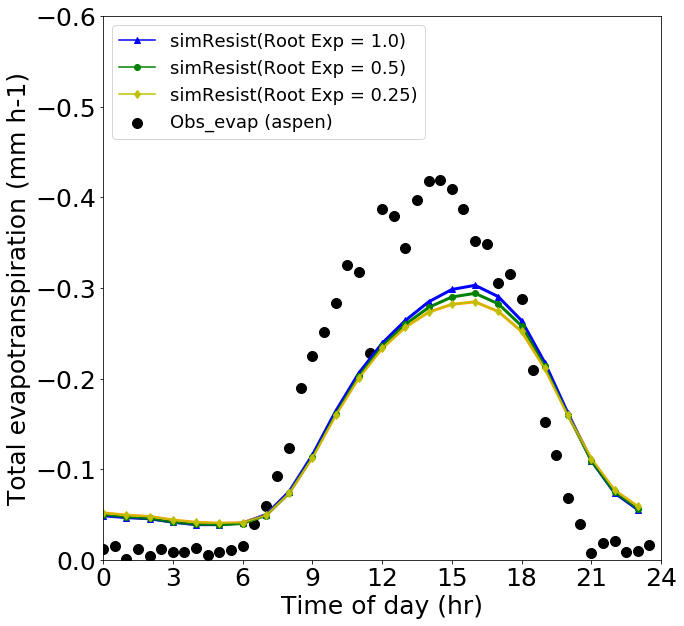

In [53]:
# create plot with the Parameterization of Root Distributions(Root Exp : 1.0, 0.5, 0.25 )
sim_ET_Combine_Graph = sim_ET_Combine.plot(color=['blue', 'green', 'orange'],linewidth=3.0)
# invert y axis
sim_ET_Combine_Graph.invert_yaxis()

sim_ET_Combine_Graph.plot(sim_ET_Combine['simResist(Root Exp = 1.0)'],color='b', marker='^') 
sim_ET_Combine_Graph.plot(sim_ET_Combine['simResist(Root Exp = 0.5)'], color='g', marker='o')
sim_ET_Combine_Graph.plot(sim_ET_Combine['simResist(Root Exp = 0.25)'], color='y', marker='d')

sim_ET_Combine_Graph.tick_params(labelsize = 15)
# plot scatter with x='xvals', y='Observation (aspen)'
sim_ET_Combine_Graph.scatter(xvals, df_gp_hr['Obs_evap (aspen)'], color='black', s=100)
# add x, y label
sim_ET_Combine_Graph.set_xlabel("Time of day (hr)", fontsize=25)
sim_ET_Combine_Graph.set_ylabel("Total evapotranspiration (mm h-1)", fontsize=25)

handles, labels = sim_ET_Combine_Graph.get_legend_handles_labels()
# show up the legend
sim_ET_Combine_Graph.legend(handles[3:7], labels[3:7], loc=2,fontsize=18)
jtplot.figsize(x=10, y=10)
plt.xlim(0,24)
plt.ylim(0,-0.6)
x = [0,3,6,9,12,15,18,21,24]
plt.xticks(x, x, fontsize=25)
plt.yticks(fontsize=25)

#### 4.6) Combine the Parameterization of Root Distributions with Ball-Berry method into a single Pandas Dataframe

In [55]:
# create each rootDistExp object
BallBerry_rootDistExp_1 = BallBerry_rootDistExp['sim0']
BallBerry_rootDistExp_0_5 = BallBerry_rootDistExp['sim1']
BallBerry_rootDistExp_0_25 = BallBerry_rootDistExp['sim2']

In [56]:
# Combine ET for each rootDistExp
BallBerry_ET_Combine = pd.concat([BallBerry_rootDistExp_1, BallBerry_rootDistExp_0_5, BallBerry_rootDistExp_0_25], axis=1)
# add label 
BallBerry_ET_Combine.columns = ['BallBerry(Root Exp = 1.0)', 'BallBerry(Root Exp = 0.5)', 'BallBerry(Root Exp = 0.25)']

In [57]:
BallBerry_ET_Combine

,BallBerry(Root Exp = 1.0),BallBerry(Root Exp = 0.5),BallBerry(Root Exp = 0.25)
0,-0.017531,-0.012847,-0.010301
1,-0.015479,-0.011028,-0.008658
2,-0.014579,-0.010117,-0.007765
3,-0.013192,-0.008823,-0.006572
4,-0.011868,-0.007570,-0.005382
5,-0.011147,-0.006933,-0.004860
6,-0.011629,-0.007584,-0.005634
7,-0.026399,-0.021881,-0.018781
8,-0.068586,-0.061699,-0.052542
9,-0.133186,-0.119483,-0.097343


#### 4.7) Plotting output of the Parameterization of Root Distributions and observation data

(array([-0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ]),
 <a list of 7 Text yticklabel objects>)

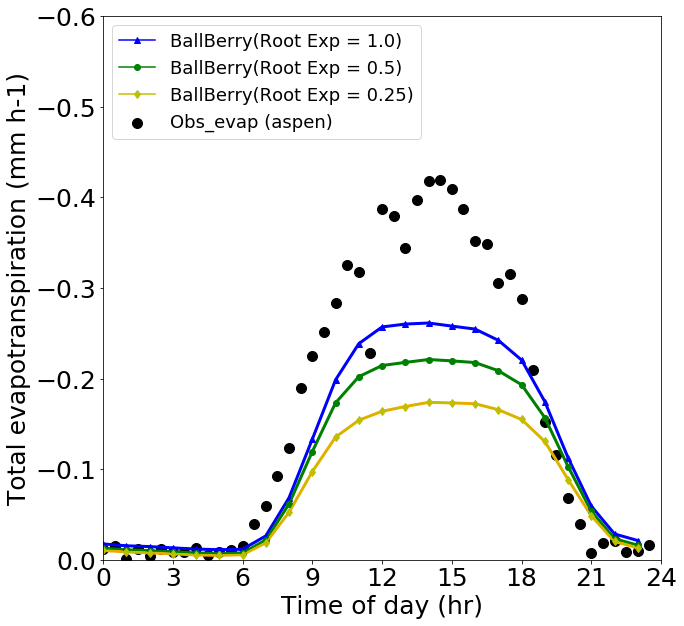

In [58]:
# create plot with the Parameterization of Root Distributions(Root Exp : 1.0, 0.5, 0.25 )
BallBerry_ET_Combine_Graph = BallBerry_ET_Combine.plot(color=['blue', 'green', 'orange'],linewidth=3.0)
# invert y axis
BallBerry_ET_Combine_Graph.invert_yaxis()

BallBerry_ET_Combine_Graph.plot(BallBerry_ET_Combine['BallBerry(Root Exp = 1.0)'],color='b', marker='^') 
BallBerry_ET_Combine_Graph.plot(BallBerry_ET_Combine['BallBerry(Root Exp = 0.5)'], color='g', marker='o')
BallBerry_ET_Combine_Graph.plot(BallBerry_ET_Combine['BallBerry(Root Exp = 0.25)'], color='y', marker='d')

BallBerry_ET_Combine_Graph.tick_params(labelsize = 15)
# plot scatter with x='xvals', y='Observation (aspen)'
BallBerry_ET_Combine_Graph.scatter(xvals, df_gp_hr['Obs_evap (aspen)'], color='black', s=100)
# add x, y label
BallBerry_ET_Combine_Graph.set_xlabel("Time of day (hr)", fontsize=25)
BallBerry_ET_Combine_Graph.set_ylabel("Total evapotranspiration (mm h-1)", fontsize=25)

handles, labels = BallBerry_ET_Combine_Graph.get_legend_handles_labels()
# show up the legend
BallBerry_ET_Combine_Graph.legend(handles[3:7], labels[3:7], loc=2,fontsize=18)
jtplot.figsize(x=10, y=10)
plt.xlim(0,24)
plt.ylim(0,-0.6)
x = [0,3,6,9,12,15,18,21,24]
plt.xticks(x, x, fontsize=25)
plt.yticks(fontsize=25)

#### 4.8) Combine the Parameterization of Root Distributions with Jarvis method  into a single Pandas Dataframe

In [59]:
# create each rootDistExp object
Jarvis_rootDistExp_1 = Jarvis_rootDistExp['sim0']
Jarvis_rootDistExp_0_5 = Jarvis_rootDistExp['sim1']
Jarvis_rootDistExp_0_25 = Jarvis_rootDistExp['sim2']

In [60]:
# Combine ET for each rootDistExp
Jarvis_ET_Combine = pd.concat([Jarvis_rootDistExp_1, Jarvis_rootDistExp_0_5, Jarvis_rootDistExp_0_25], axis=1)
# add label 
Jarvis_ET_Combine.columns = ['Jarvis(Root Exp = 1.0)', 'Jarvis(Root Exp = 0.5)', 'Jarvis(Root Exp = 0.25)']

In [61]:
Jarvis_ET_Combine

,Jarvis(Root Exp = 1.0),Jarvis(Root Exp = 0.5),Jarvis(Root Exp = 0.25)
0,-0.013567,-0.009666,-0.007758
1,-0.011801,-0.008066,-0.006330
2,-0.011029,-0.007111,-0.005397
3,-0.009797,-0.005913,-0.004291
4,-0.008568,-0.004701,-0.003156
5,-0.007946,-0.004169,-0.002725
6,-0.009240,-0.005481,-0.003832
7,-0.025712,-0.021040,-0.017259
8,-0.068941,-0.061650,-0.052693
9,-0.134536,-0.122726,-0.105941


#### 4.9) Plotting output of the Parameterization of Root Distributions and observation data

(array([-0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ]),
 <a list of 7 Text yticklabel objects>)

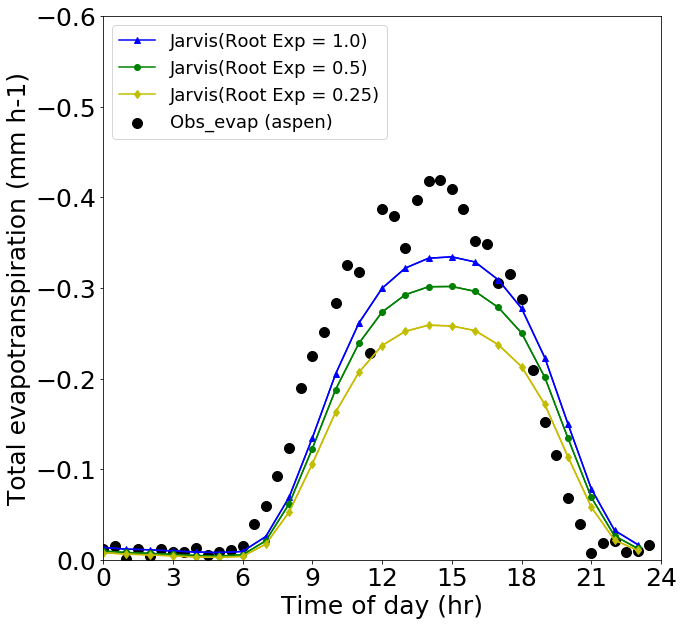

In [62]:
# create plot with the Parameterization of Root Distributions(Root Exp : 1.0, 0.5, 0.25 )
Jarvis_ET_Combine_Graph = Jarvis_ET_Combine.plot(color=['blue', 'green', 'orange'])
# invert y axis
Jarvis_ET_Combine_Graph.invert_yaxis()

Jarvis_ET_Combine_Graph.plot(Jarvis_ET_Combine['Jarvis(Root Exp = 1.0)'],color='b', marker='^') 
Jarvis_ET_Combine_Graph.plot(Jarvis_ET_Combine['Jarvis(Root Exp = 0.5)'], color='g', marker='o')
Jarvis_ET_Combine_Graph.plot(Jarvis_ET_Combine['Jarvis(Root Exp = 0.25)'], color='y', marker='d')

Jarvis_ET_Combine_Graph.tick_params(labelsize = 15)
# plot scatter with x='xvals', y='Observation (aspen)'
Jarvis_ET_Combine_Graph.scatter(xvals, df_gp_hr['Obs_evap (aspen)'], color='black', s=100)
# add x, y label
Jarvis_ET_Combine_Graph.set_xlabel("Time of day (hr)", fontsize=25)
Jarvis_ET_Combine_Graph.set_ylabel("Total evapotranspiration (mm h-1)", fontsize=25)

handles, labels = Jarvis_ET_Combine_Graph.get_legend_handles_labels()
# show up the legend
Jarvis_ET_Combine_Graph.legend(handles[3:7], labels[3:7], loc=2,fontsize=18)
jtplot.figsize(x=10, y=10)
plt.xlim(0,24)
plt.ylim(0,-0.6)
x = [0,3,6,9,12,15,18,21,24]
plt.xticks(x, x, fontsize=25)
plt.yticks(fontsize=25)

#### 4.10) Validation between the observation and simulation data.

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
from pysumma.Validation import validation

#### Validation for simple soil Resistance method 

In [42]:
# defind simulation data
simple_resistance_simulation_1 = sim_ET_Combine['simResist(Root Exp = 1.0)']
simple_resistance_simulation_0_5 = sim_ET_Combine['simResist(Root Exp = 0.5)']
simple_resistance_simulation_0_25 = sim_ET_Combine['simResist(Root Exp = 0.25)']

In [43]:
# defind observation data
obs = df_gp_hr.groupby('level_0').mean()
observation_data = obs['Observation (aspen)']

In [44]:
# analyze validtation between BallBerry simulation and observation data with root Distribution exponent = 1.0.
validation.analysis(observation_data, simple_resistance_simulation_1)

Mean Absolute Error: 0.033234
Mean Squared Error: 0.001449
Root Mean Squared Error: 0.038060


In [45]:
# analyze validtation between BallBerry simulation and observation data with root Distribution exponent = 0.5.
validation.analysis(observation_data, simple_resistance_simulation_0_5)

Mean Absolute Error: 0.033405
Mean Squared Error: 0.001445
Root Mean Squared Error: 0.038015


In [46]:
# analyze validtation between BallBerry simulation and observation data with root Distribution exponent = 0.25.
validation.analysis(observation_data, simple_resistance_simulation_0_25)

Mean Absolute Error: 0.034646
Mean Squared Error: 0.001503
Root Mean Squared Error: 0.038766


#### Validation for BallBerry method 

In [47]:
# defind simulation data
BallBerry_resistance_simulation_1 = BallBerry_ET_Combine['BallBerry(Root Exp = 1.0)']
BallBerry_resistance_simulation_0_5 = BallBerry_ET_Combine['BallBerry(Root Exp = 0.5)']
BallBerry_resistance_simulation_0_25 = BallBerry_ET_Combine['BallBerry(Root Exp = 0.25)']

In [48]:
# defind observation data
obs = df_gp_hr.groupby('level_0').mean()
observation_data = obs['Observation (aspen)']

In [49]:
# analyze validtation between BallBerry simulation and observation data with root Distribution exponent = 1.0.
validation.analysis(observation_data, BallBerry_resistance_simulation_1)

Mean Absolute Error: 0.014720
Mean Squared Error: 0.000434
Root Mean Squared Error: 0.020833


In [50]:
# analyze validtation between BallBerry simulation and observation data with root Distribution exponent = 0.5.
validation.analysis(observation_data, BallBerry_resistance_simulation_0_5)

Mean Absolute Error: 0.023826
Mean Squared Error: 0.001356
Root Mean Squared Error: 0.036822


In [51]:
# analyze validtation between BallBerry simulation and observation data with root Distribution exponent = 0.25.
validation.analysis(observation_data, BallBerry_resistance_simulation_0_25)

Mean Absolute Error: 0.039972
Mean Squared Error: 0.003735
Root Mean Squared Error: 0.061116


#### Validation for Jarvis method 

In [52]:
# defind simulation data
Jarvis_resistance_simulation_1 = Jarvis_ET_Combine['Jarvis(Root Exp = 1.0)']
Jarvis_resistance_simulation_0_5 = Jarvis_ET_Combine['Jarvis(Root Exp = 0.5)']
Jarvis_resistance_simulation_0_25 = Jarvis_ET_Combine['Jarvis(Root Exp = 0.25)']

In [53]:
# defind observation data
obs = df_gp_hr.groupby('level_0').mean()
observation_data = obs['Observation (aspen)']

In [54]:
# analyze validtation between BallBerry simulation and observation data with root Distribution exponent = 1.0.
validation.analysis(observation_data, Jarvis_resistance_simulation_1)

Mean Absolute Error: 0.019703
Mean Squared Error: 0.000915
Root Mean Squared Error: 0.030249


In [55]:
# analyze validtation between BallBerry simulation and observation data with root Distribution exponent = 0.5.
validation.analysis(observation_data, Jarvis_resistance_simulation_0_5)

Mean Absolute Error: 0.014254
Mean Squared Error: 0.000419
Root Mean Squared Error: 0.020469


In [56]:
# analyze validtation between BallBerry simulation and observation data with root Distribution exponent = 0.25.
validation.analysis(observation_data, Jarvis_resistance_simulation_0_25)

Mean Absolute Error: 0.019057
Mean Squared Error: 0.000663
Root Mean Squared Error: 0.025750


## 5. Discussion

As stated in Clark et al., 2015, the following insights can be gained from this analysis:

* The simulation in Figure 8 illustrates the sensitivity of evapotranspiration to the distribution of roots, which dictates the capability of plants to access water

* The results in Figure 8 demonstrate strong sensitivities the rooting profile. Lower root distribution exponents place more roots near the surface. This makes it more difficult for plants to extract soil water lower in the soil profile, and decreases transpiration

## 6. Post notebook and simulation results back to Hydroshare

In [57]:
from pysumma.hydroshare import hydroshare
hs = hydroshare.hydroshare()

Successfully established a connection with HydroShare


In [58]:
# zip a renewal SUMMA Model Instance to upload on HydroShare
import shutil, os
archive_name = os.path.expanduser(os.path.join('~', os.getcwd() +'/' + instance +'_new'))
root_dir = os.path.expanduser(os.path.join('~', os.getcwd() +'/' + instance))
shutil.make_archive(archive_name, 'zip', root_dir)
Model_instance = os.getcwd() +'/' + instance +'_new.zip'

In [59]:
# set meta data such as abstract, title, keywords, rtype to create a new SUMMA Model Instance
title = 'The Impact of Root Distributions Parameterizations of SUMMA Model in Aspen stand at Reynolds Mountain Eas_new'
abstract = 'The Impact of Root Distributions Parameterizations of SUMMA Model in Aspen stand at Reynolds Mountain East(new)'
keywords = ('SUMMA', 'Hydrologic Model', 'Reynolds Mountain East', 'root Distribution', 'Evapotranspiration')
rtype = 'ModelInstanceResource'
fpath = Model_instance,
metadata = '[{"creator":{"name":"Youngdon Choi"}}, {"creator":{"name":"Jeffrey Sadler"}}]'
extra_metadata = '{"key-1": "value-1", "key-2": "value-2"}'

In [60]:
# create a new SUMMA Model Instance on HydroShare
resource_id1 = hs.createHydroShareResource(title=title, content_files=fpath, keywords=keywords, abstract=abstract, resource_type='modelinstanceresource', public=False)

Resource Created Successfully                           


In [61]:
# set meta data such as abstract, title, keywords, rtype to create a SUMMA Composite Resource that contains SUMMA Model instance, output, and notebook.
title = 'The Impact of Root Distributions Parameterizations of SUMMA Model in Aspen stand at Reynolds Mountain East_new'
abstract = 'The Impact of Root Distributions Parameterizations of SUMMA Model in Aspen stand at Reynolds Mountain East(new)'
keywords = ('SUMMA', 'Hydrologic Model', 'Reynolds Mountain East', 'root Distribution', 'Evapotranspiration')
rtype = 'CompositeResource'
files = output_sim_rootDistExp, output_ball_rootDistExp, output_jar_rootDistExp
metadata = '[{"creator":{"name":"Youngdon Choi"}}, {"creator":{"name":"Jeffrey Sadler"}}]'
extra_metadata = '{"key-1": "value-1", "key-2": "value-2"}'

In [62]:
# create a new SUMMA Composite Resource on HydroShare
resource_id2 = hs.createHydroShareResource(title=title, content_files=files, keywords=keywords, abstract=abstract, resource_type='compositeresource', public=False)

Resource Created Successfully                           
Successfully Added Content Files                      


In [63]:
# add a new SUMMA Model Instance to a new SUMMA Composite Resource.
hs.addContentToExistingResource(resource_id2, [Model_instance])

Successfully Added Content Files                      


#### Save this notebook file to add the notebook to rhe resource of summa output

In [65]:
# add a new notebook to a new SUMMA Composite Resource.
npath = os.getcwd() +'/SummaModel_ReynoldsAspenStand_RootDistribution.ipynb'
# check the resource id on HS that created.
hs.addContentToExistingResource(resource_id2, [npath])

Successfully Added Content Files                      
